In [24]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

n_samples = 100
n_experiments = 1000
statis_signif = 0.95
mu, sigma = 0, 1  #mean and standerd deviation
conf_band = stats.norm.interval(statis_signif, loc=mu, scale=sigma)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), n_samples)
norm_cdf = norm.cdf(x)

max_dist = 0
worst = 1
best = 0
best_array = np.zeros(n_samples)
worst_array = np.zeros(n_samples)
contained = 0

for i in range(0, n_experiments):
    samples = np.random.normal(mu, sigma, n_samples)

    for j in range(0, n_samples):
        if conf_band[0] <= samples[j] <= conf_band[1]:
            contained += 1

        if abs(samples[j] - norm_cdf[j]) > max_dist:
            max_dist = samples[j]
    
    if max_dist > worst:
        worst_array = samples
        worst = max_dist
    
    if max_dist < best:
        best_array = samples
        best = max_dist

percentage = float(100 * contained) / float(n_samples * n_experiments)
print('The percentage of time that the interval contained the CDF is %f' % percentage)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100) 

sorted_best = np.sort(best_array)
best_cdf = np.arange(0, 1, 1/float(n_samples))
sorted_worst = np.sort(worst_array)
worst_cdf = np.arange(0, 1, 1/float(n_samples))


plt.plot(x, norm_cdf, label='norm_CDF', c='blue')
plt.plot(sorted_best, best_cdf, label='best_CDF', c='green')
plt.plot(sorted_worst, worst_cdf, label='worst_CDF', c='black')
plt.title('Cumulative Distribution Function', fontsize=14)
plt.legend(loc='lower right', fontsize=8)

plt.show()

SyntaxError: invalid syntax (<ipython-input-24-32d6e980dd0f>, line 56)

[-2.32634787 -2.27935095 -2.23235402 -2.18535709 -2.13836017 -2.09136324
 -2.04436631 -1.99736939 -1.95037246 -1.90337553 -1.85637861 -1.80938168
 -1.76238475 -1.71538783 -1.6683909  -1.62139397 -1.57439705 -1.52740012
 -1.48040319 -1.43340627 -1.38640934 -1.33941241 -1.29241549 -1.24541856
 -1.19842163 -1.15142471 -1.10442778 -1.05743085 -1.01043393 -0.963437
 -0.91644007 -0.86944314 -0.82244622 -0.77544929 -0.72845236 -0.68145544
 -0.63445851 -0.58746158 -0.54046466 -0.49346773 -0.4464708  -0.39947388
 -0.35247695 -0.30548002 -0.2584831  -0.21148617 -0.16448924 -0.11749232
 -0.07049539 -0.02349846  0.02349846  0.07049539  0.11749232  0.16448924
  0.21148617  0.2584831   0.30548002  0.35247695  0.39947388  0.4464708
  0.49346773  0.54046466  0.58746158  0.63445851  0.68145544  0.72845236
  0.77544929  0.82244622  0.86944314  0.91644007  0.963437    1.01043393
  1.05743085  1.10442778  1.15142471  1.19842163  1.24541856  1.29241549
  1.33941241  1.38640934  1.43340627  1.48040319  1.52

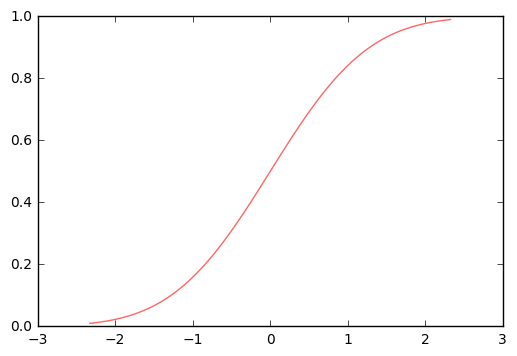

In [7]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
print(x)
print(norm.cdf(x))
ax.plot(x, norm.cdf(x), 'r-', lw=1, alpha=0.6, label='norm cdf')
plt.show()

In [102]:
#from future import division
import numpy as np
import scipy as sp
import scipy.stats as stats
#from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

N = 100
confidence = 0.95
a = np.random.normal(0, 1, N)
mean, sigma = a.mean(), a.std(ddof=1)
conf_int_a = stats.norm.interval(confidence, loc=mean, scale=sigma)

experiments = 1000
CI_count = 0

min_Dn=1
max_Dn=0
best_arr=np.zeros(N)
worst_arr=np.zeros(N)

for i in range(0,experiments):
    samples = np.random.normal(0, 1, N)

    for j in range(0,N):
        if conf_int_a[0] <= samples[j] <= conf_int_a[1]:
            CI_count += 1
            

    #KS = sp(samples, 'norm')

    #if KS[0] < min_Dn:
        #min_Dn = KS[0]
        #best_arr = samples

    #if KS[0] > max_Dn:
        #max_Dn = KS[0]
        #worst_arr = samples   
print(type(CI_count))
print(CI_count)
print(experiments)
print(str(float(CI_count)/float(experiments)) + "% of the samples are contained in the CI")

<type 'int'>
97730
1000
97.73% of the samples are contained in the CI
